# Covid Population Worldwide daily data.

Data Source: https://www.kaggle.com/josephassaker/covid19-global-dataset?select=worldometer_coronavirus_daily_data.csv

In [482]:
import pandas as pd

In [483]:
df = pd.read_csv("datasets/ml/covid/worldometer_coronavirus_daily_data.csv")
df.dtypes

date                        object
country                     object
cumulative_total_cases     float64
daily_new_cases            float64
active_cases               float64
cumulative_total_deaths    float64
daily_new_deaths           float64
dtype: object

In [484]:
df["date"] = pd.to_datetime(df["date"])

In [485]:
df.dtypes

date                       datetime64[ns]
country                            object
cumulative_total_cases            float64
daily_new_cases                   float64
active_cases                      float64
cumulative_total_deaths           float64
daily_new_deaths                  float64
dtype: object

In [486]:
covid_us = df[(df["country"] == "USA") & (df["date"] >= "2020-3-11") & (df["date"] < "2021-3-11")].reset_index().drop("index", axis = 1)

In [487]:
covid_us

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-03-11,USA,1301.0,307.0,1248.0,38.0,8.0
1,2020-03-12,USA,2475.0,1174.0,2424.0,42.0,4.0
2,2020-03-13,USA,3224.0,749.0,3165.0,49.0,7.0
3,2020-03-14,USA,4026.0,802.0,3918.0,58.0,9.0
4,2020-03-15,USA,5072.0,1046.0,4936.0,75.0,17.0
...,...,...,...,...,...,...,...
360,2021-03-06,USA,29727256.0,60430.0,7331017.0,548973.0,1608.0
361,2021-03-07,USA,29770954.0,43698.0,7298282.0,549813.0,840.0
362,2021-03-08,USA,29815162.0,44208.0,7226193.0,550681.0,868.0
363,2021-03-09,USA,29871284.0,56122.0,7178319.0,552019.0,1338.0


In [488]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

Text(0.5, 1.0, 'Covid-19 Cases over time')

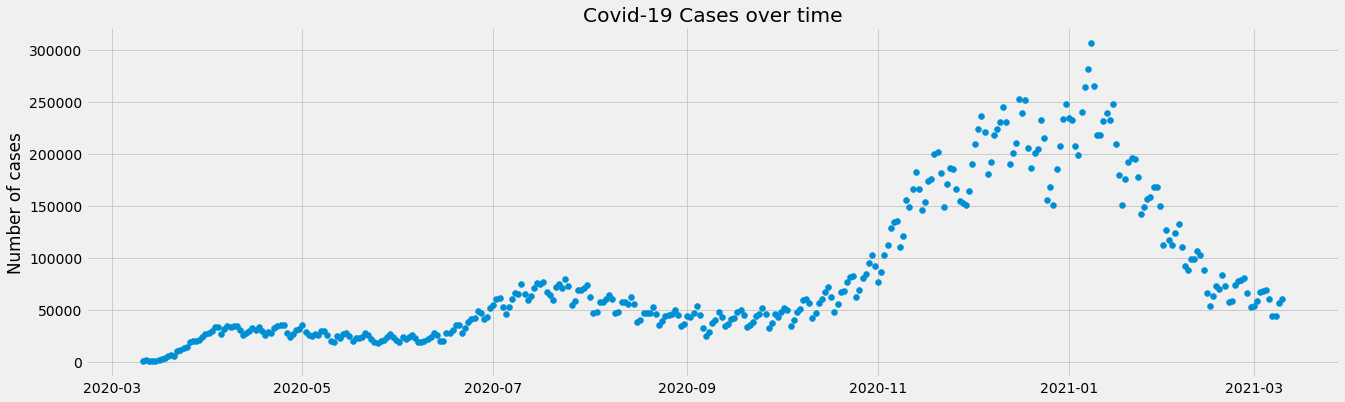

In [489]:
plt.rcParams["figure.figsize"] = (20,6)
plt.scatter(covid_us["date"], covid_us["daily_new_cases"])
plt.ylabel("Number of cases")
plt.title("Covid-19 Cases over time")

Text(0.5, 1.0, 'Death due to Covid-19 over time')

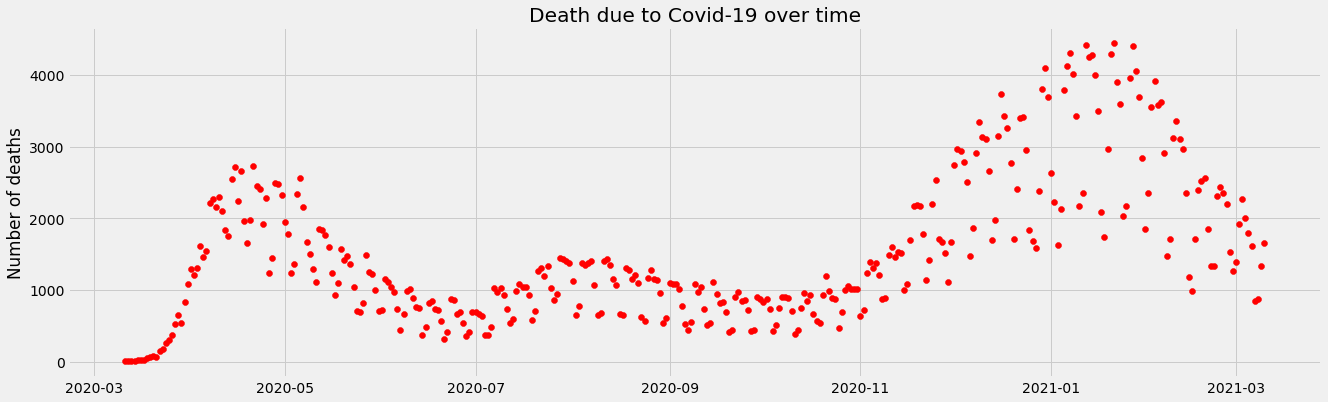

In [490]:
plt.rcParams["figure.figsize"] = (20,6)
plt.scatter(covid_us["date"], covid_us["daily_new_deaths"], color = "r")
plt.ylabel("Number of deaths")
plt.title("Death due to Covid-19 over time")

In [491]:
s5health = pd.read_csv("datasets/sp500indexand11sectors/S5HLTH INDEX.csv")
s5health["Date"] = pd.to_datetime(s5health["Date"])
s5health.head()

,Date,Open,High,Low,Close
0,2020-03-12,1059.56,1059.56,983.76,985.40
1,2020-03-13,985.49,1054.24,977.05,1053.92
2,2020-03-16,1053.63,1053.63,946.45,948.61
3,2020-03-17,948.61,1015.04,948.61,1007.95
4,2020-03-18,1007.95,1007.95,927.76,973.71


In [492]:
covid_sp500health_merge = covid_us.merge(s5health[['Close','Date']], how="inner", left_on = "date", right_on = "Date")

In [493]:
# Close is for SP500Healthcare index
covid_sp500health_merge

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,Close,Date
0,2020-03-12,USA,2475.0,1174.0,2424.0,42.0,4.0,985.40,2020-03-12
1,2020-03-13,USA,3224.0,749.0,3165.0,49.0,7.0,1053.92,2020-03-13
2,2020-03-16,USA,6408.0,1336.0,6236.0,96.0,21.0,948.61,2020-03-16
3,2020-03-17,USA,8850.0,2442.0,8621.0,121.0,25.0,1007.95,2020-03-17
4,2020-03-18,USA,12588.0,3738.0,12305.0,173.0,52.0,973.71,2020-03-18
...,...,...,...,...,...,...,...,...,...
246,2021-03-04,USA,29597417.0,68134.0,7402482.0,545565.0,1998.0,1289.06,2021-03-04
247,2021-03-05,USA,29666826.0,69409.0,7375158.0,547365.0,1800.0,1315.14,2021-03-05
248,2021-03-08,USA,29815162.0,44208.0,7226193.0,550681.0,868.0,1311.39,2021-03-08
249,2021-03-09,USA,29871284.0,56122.0,7178319.0,552019.0,1338.0,1319.47,2021-03-09


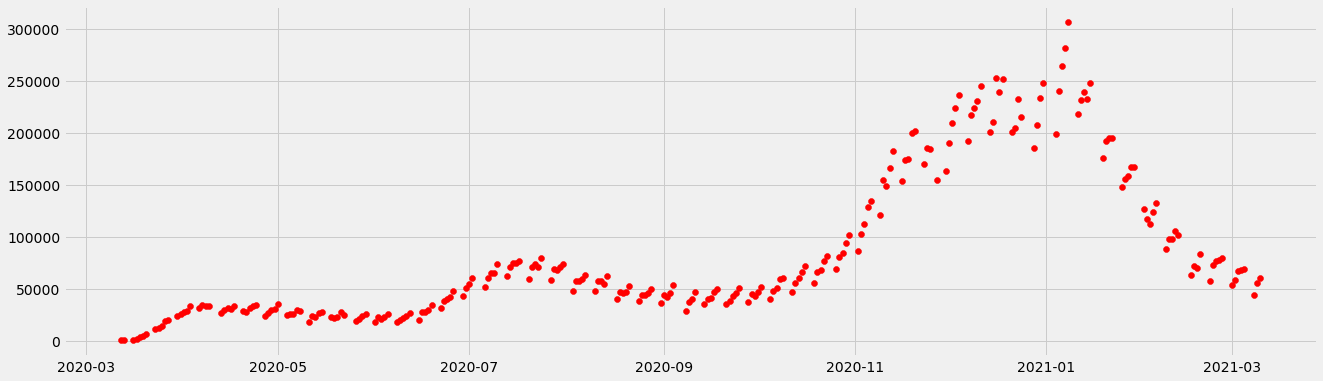

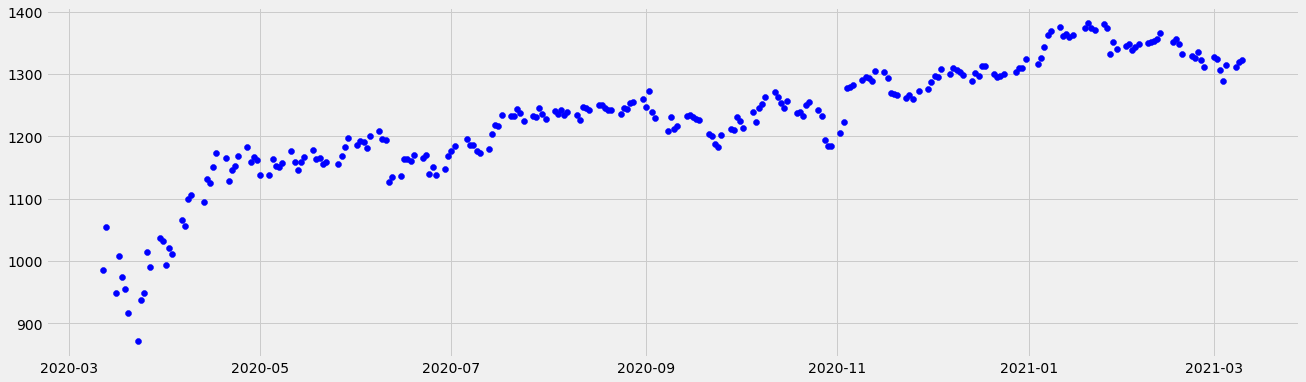

In [494]:
plt.scatter(covid_sp500health_merge["date"], covid_sp500health_merge["daily_new_cases"], color = "r")
plt.show()
plt.scatter(covid_sp500health_merge["date"], covid_sp500health_merge["Close"], color = "b")
plt.show()

<AxesSubplot:xlabel='date'>

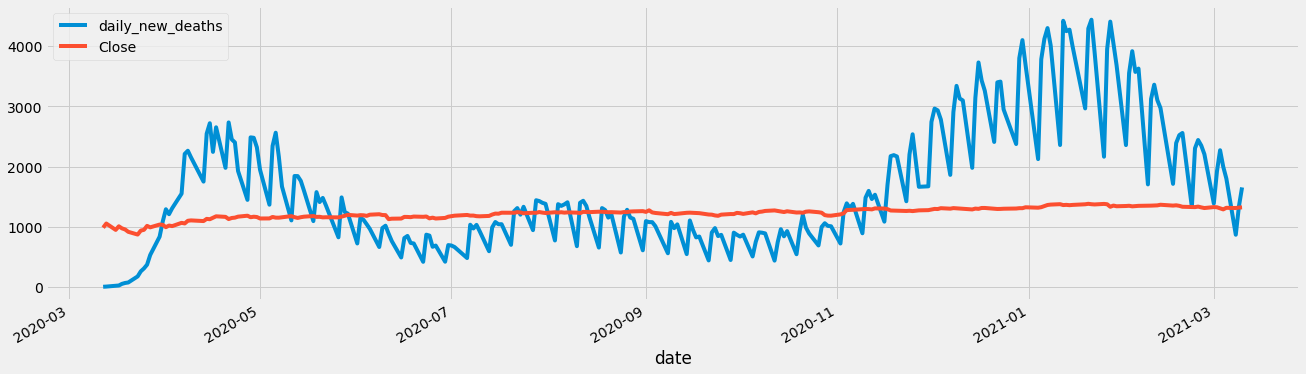

In [495]:
plt.rcParams["figure.figsize"] = (20,6)
covid_sp500health_merge[["date","daily_new_deaths","Close"]].set_index("date").plot()

Text(0.5, 1.0, 'Covid-death vs SP500Healthcare overtime')

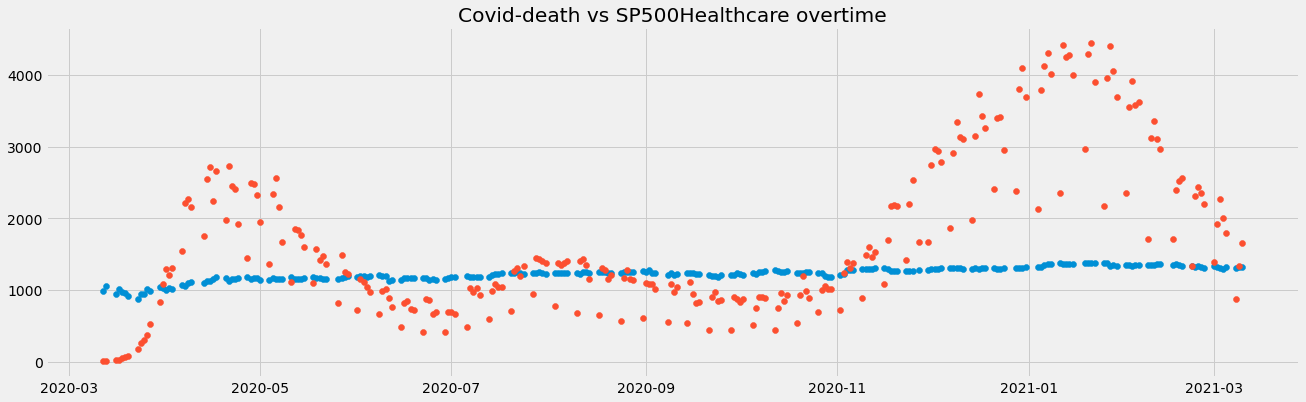

In [496]:
plt.scatter(covid_sp500health_merge["date"], covid_sp500health_merge["Close"])
plt.scatter(covid_sp500health_merge["date"], covid_sp500health_merge["daily_new_deaths"])
plt.title("Covid-death vs SP500Healthcare overtime")

## Correlation

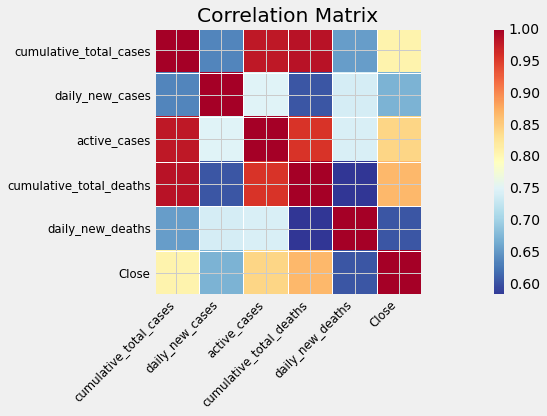

In [497]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
#calculate correlation
correlation = covid_sp500health_merge.corr()
#plot correlation
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()

## New Correlation

In [498]:
# Get data of daily cases and daily deaths
us_daily_sp500 = covid_sp500health_merge[['date','daily_new_cases',"daily_new_deaths", 'Close']]
us_daily_sp500.head()

,date,daily_new_cases,daily_new_deaths,Close
0,2020-03-12,1174.0,4.0,985.40
1,2020-03-13,749.0,7.0,1053.92
2,2020-03-16,1336.0,21.0,948.61
3,2020-03-17,2442.0,25.0,1007.95
4,2020-03-18,3738.0,52.0,973.71


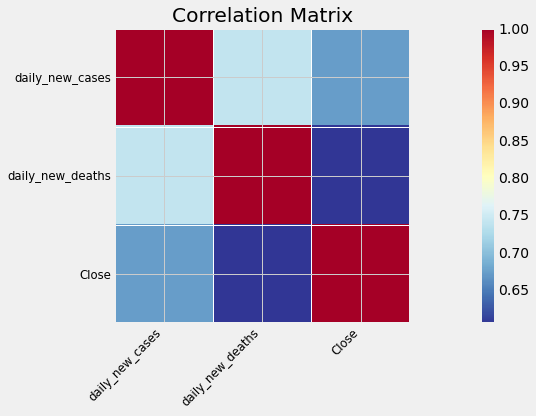

In [510]:
#calculate correlation of daily cases & deaths to health sector close price
correlation = us_daily_sp500.corr()
#plot correlation
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()

In [499]:
# Load spxHealth
spxHealth = pd.read_csv("datasets/SPX_Health_Sector_stocks_all.csv")
spxHealth

,Ticker,Date,Open,High,Low,Close,Trading Volume,Volume Weighted Average Price,Number of Transactions
0,ABT,2020-03-11,73.28,78.1500,72.01,74.74,14123240.0,74.9395,113015
1,ABT,2020-03-12,77.91,82.6700,74.83,81.65,18521541.0,77.7958,160884
2,ABT,2020-03-15,70.65,79.2500,70.00,73.66,14358978.0,75.4936,113523
3,ABT,2020-03-16,75.52,79.7900,73.34,79.49,13441141.0,77.9694,124950
4,ABT,2020-03-17,74.98,81.9900,74.39,79.26,17680823.0,78.7228,141919
...,...,...,...,...,...,...,...,...,...
30130,BNTX,2021-12-26,253.24,259.9000,250.23,254.84,1515642.0,256.4526,31055
30131,BNTX,2021-12-27,250.35,256.4854,238.27,241.40,2555171.0,245.9939,49045
30132,BNTX,2021-12-28,235.12,244.3000,231.73,240.61,2713692.0,238.4607,43521
30133,BNTX,2021-12-29,239.02,258.8200,238.00,256.81,2353520.0,251.8848,36782


In [500]:
# Filer only Date and Close column for spxHealth
spxHealth_1 = spxHealth[['Ticker', 'Date', 'Close']]
spxHealth_1.head()

,Ticker,Date,Close
0,ABT,2020-03-11,74.74
1,ABT,2020-03-12,81.65
2,ABT,2020-03-15,73.66
3,ABT,2020-03-16,79.49
4,ABT,2020-03-17,79.26


In [501]:
# Pivot spxHealth
spxHealth_pivot = spxHealth_1.pivot(index=['Date'], columns = ['Ticker'], values = ['Close'])
spxHealth_pivot.head()

Close                                                              \
Ticker          A   ABBV    ABC    ABMD    ABT    ALGN    AMGN    ANTM    AZN   
Date                                                                            
2020-03-11  63.42  78.61  80.49  136.97  74.74  180.12  182.24  256.21  40.76   
2020-03-12  69.20  85.37  90.00  142.82  81.65  195.88  202.10  270.34  42.28   
2020-03-15  64.13  74.27  80.50  142.44  73.66  161.72  188.68  224.04  37.79   
2020-03-16  70.44  73.02  89.50  145.25  79.49  169.25  207.80  238.32  40.93   
2020-03-17  68.87  71.03  84.97  146.55  79.26  145.76  204.88  206.96  39.36   

                   ...                                                       \
Ticker        BAX  ...     TMO     UHS     UNH    VRTX VTRS     WAT     WST   
Date               ...                                                        
2020-03-11  75.47  ...  284.32   99.80  250.41  204.06  NaN  167.05  142.76   
2020-03-12  80.99  ...  300.12  105.09  272.04  220.86  NaN  184.48  146.11   
2020-03-15  71.57  ...  279.35   81.70  225.04  199.77  NaN  173.92  130.47   
2020-03-16  80.51  ...  296.31   80.76  244.22  210.44  NaN  183.27  143.09   
2020-03-17  84.59  ...  302.98   67.69  217.06  212.98  NaN  176.81  143.49   

                                   
Ticker       XRAY     ZBH     ZTS  
Date                               
2020-03-11  39.93  102.03  120.28  
2020-03-12  40.46   97.80  125.48  
2020-03-15  35.18   92.00  107.04  
2020-03-16  34.58   86.16  111.05  
2020-03-17  32.74   80.63  105.82  

[5 rows x 67 columns]

In [502]:
# Reset spxHealth
spx_new = spxHealth_pivot.reset_index()
spx_new.head()

Date  Close                                               \
Ticker                  A   ABBV    ABC    ABMD    ABT    ALGN    AMGN   
0       2020-03-11  63.42  78.61  80.49  136.97  74.74  180.12  182.24   
1       2020-03-12  69.20  85.37  90.00  142.82  81.65  195.88  202.10   
2       2020-03-15  64.13  74.27  80.50  142.44  73.66  161.72  188.68   
3       2020-03-16  70.44  73.02  89.50  145.25  79.49  169.25  207.80   
4       2020-03-17  68.87  71.03  84.97  146.55  79.26  145.76  204.88   

                       ...                                               \
Ticker    ANTM    AZN  ...     TMO     UHS     UNH    VRTX VTRS     WAT   
0       256.21  40.76  ...  284.32   99.80  250.41  204.06  NaN  167.05   
1       270.34  42.28  ...  300.12  105.09  272.04  220.86  NaN  184.48   
2       224.04  37.79  ...  279.35   81.70  225.04  199.77  NaN  173.92   
3       238.32  40.93  ...  296.31   80.76  244.22  210.44  NaN  183.27   
4       206.96  39.36  ...  302.98   67.69  217.06  212.98  NaN  176.81   

                                       
Ticker     WST   XRAY     ZBH     ZTS  
0       142.76  39.93  102.03  120.28  
1       146.11  40.46   97.80  125.48  
2       130.47  35.18   92.00  107.04  
3       143.09  34.58   86.16  111.05  
4       143.49  32.74   80.63  105.82  

[5 rows x 68 columns]

In [503]:
spx_new.dtypes

       Ticker
Date              object
Close  A         float64
       ABBV      float64
       ABC       float64
       ABMD      float64
                  ...   
       WAT       float64
       WST       float64
       XRAY      float64
       ZBH       float64
       ZTS       float64
Length: 68, dtype: object

In [504]:
#Chaneg datatype for Date
spx_new["Date"] = pd.to_datetime(spx_new["Date"])

In [505]:
#Check if it changed
spx_new.dtypes

       Ticker
Date             datetime64[ns]
Close  A                float64
       ABBV             float64
       ABC              float64
       ABMD             float64
                      ...      
       WAT              float64
       WST              float64
       XRAY             float64
       ZBH              float64
       ZTS              float64
Length: 68, dtype: object

In [507]:
# Merge spxHealth to health sector
spx_health_close_price_merge = covid.merge(us_daily_sp500, how="inner", left_on ="Date", right_on= 'date')

In [508]:
spx_health_close_price_merge.head()

,"(Date, )","(Close, AZN)","(Close, BNTX)","(Close, JNJ)","(Close, MRNA)","(Close, NVAX)","(Close, PFE)",date,daily_new_cases,daily_new_deaths,Close
0,2020-03-12,42.28,30.93,134.29,21.30,8.41,32.71,2020-03-12,1174.0,4.0,985.40
1,2020-03-16,40.93,66.60,136.59,28.18,9.50,32.16,2020-03-16,1336.0,21.0,948.61
2,2020-03-17,39.36,92.00,134.96,31.58,10.65,32.36,2020-03-17,2442.0,25.0,1007.95
3,2020-03-18,40.13,59.30,127.05,28.27,11.58,30.42,2020-03-18,3738.0,52.0,973.71
4,2020-03-19,39.42,46.50,119.89,28.20,10.35,29.01,2020-03-19,5346.0,67.0,955.54


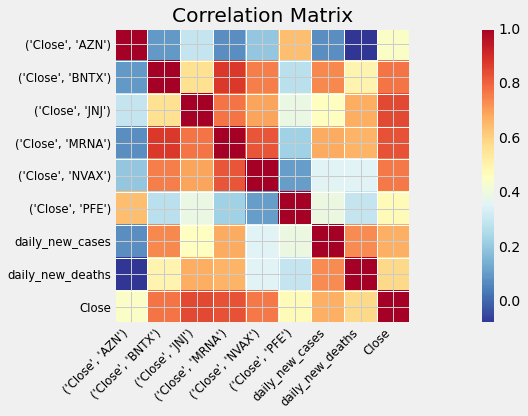

In [509]:
#calculate correlation of spx, daily death, and health sector close price
correlation = spx_health_close_price_merge.corr()
#plot correlation
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()

## Ignore. Covid and spx are repeated companies

In [511]:
#Load Covid company stock
meta = pd.read_csv("datasets/Covid_Companies_Stocks.csv", index_col=False)
meta

,Ticker,Date,Open,High,Low,Close,Trading Volume,Volume Weighted Average Price,Number of Transactions
0,PFE,2020-03-11,30.480,32.000,30.00,30.02,60585686.0,30.6586,307447
1,PFE,2020-03-12,31.270,32.880,30.23,32.71,58156515.0,31.4335,313654
2,PFE,2020-03-15,29.940,32.285,29.65,30.18,48333517.0,30.9841,270185
3,PFE,2020-03-16,31.640,32.650,30.59,32.16,52139745.0,31.6114,317412
4,PFE,2020-03-17,30.770,32.610,30.31,32.36,42228311.0,31.6159,249462
...,...,...,...,...,...,...,...,...,...
2737,NVAX,2021-12-26,168.555,169.390,155.11,157.80,8934203.0,160.0433,159765
2738,NVAX,2021-12-27,153.160,175.990,153.10,155.84,12384643.0,162.9178,185409
2739,NVAX,2021-12-28,153.280,155.280,144.56,153.25,7511780.0,150.6786,111874
2740,NVAX,2021-12-29,152.780,159.000,148.86,154.83,5093321.0,154.1007,82034


In [512]:
# Arrange by Close price
df = meta[['Ticker', 'Date', 'Close', 'Number of Transactions']]
df.head()

,Ticker,Date,Close,Number of Transactions
0,PFE,2020-03-11,30.02,307447
1,PFE,2020-03-12,32.71,313654
2,PFE,2020-03-15,30.18,270185
3,PFE,2020-03-16,32.16,317412
4,PFE,2020-03-17,32.36,249462


In [513]:
#Pivot table
df_pivot = df.pivot(index=['Date'], columns = ['Ticker'], values = ['Close'])
df_pivot.head()

Close                                    
Ticker        AZN   BNTX     JNJ   MRNA   NVAX    PFE
Date                                                 
2020-03-11  40.76  28.55  125.41  22.30   9.29  30.02
2020-03-12  42.28  30.93  134.29  21.30   8.41  32.71
2020-03-15  37.79  40.00  127.13  26.49   6.91  30.18
2020-03-16  40.93  66.60  136.59  28.18   9.50  32.16
2020-03-17  39.36  92.00  134.96  31.58  10.65  32.36

In [514]:
# Reset data frame
covid = df_pivot.reset_index()
covid.head()

Date  Close                                    
Ticker                AZN   BNTX     JNJ   MRNA   NVAX    PFE
0       2020-03-11  40.76  28.55  125.41  22.30   9.29  30.02
1       2020-03-12  42.28  30.93  134.29  21.30   8.41  32.71
2       2020-03-15  37.79  40.00  127.13  26.49   6.91  30.18
3       2020-03-16  40.93  66.60  136.59  28.18   9.50  32.16
4       2020-03-17  39.36  92.00  134.96  31.58  10.65  32.36

In [515]:
covid.dtypes

       Ticker
Date              object
Close  AZN       float64
       BNTX      float64
       JNJ       float64
       MRNA      float64
       NVAX      float64
       PFE       float64
dtype: object

In [516]:
covid["Date"] = pd.to_datetime(covid["Date"])

In [517]:
covid.dtypes

       Ticker
Date             datetime64[ns]
Close  AZN              float64
       BNTX             float64
       JNJ              float64
       MRNA             float64
       NVAX             float64
       PFE              float64
dtype: object

In [520]:
#merge all together of daily cases & deaths, spx close price, health close price, and covid close price
coivd_with_other_close_price = covid.merge(spx_health_close_price_merge, how="inner", left_on ="Date", right_on ='date')

C:\Users\nhing\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [521]:
#calculate correlation
coivd_with_other_close_price.head()

,"(Date_x, )","(Close_x, AZN)","(Close_x, BNTX)","(Close_x, JNJ)","(Close_x, MRNA)","(Close_x, NVAX)","(Close_x, PFE)","('Date', '')_y","('Close', 'AZN')_y","('Close', 'BNTX')_y","('Close', 'JNJ')_y","('Close', 'MRNA')_y","('Close', 'NVAX')_y","('Close', 'PFE')_y",date,daily_new_cases,daily_new_deaths,Close_y
0,2020-03-12,42.28,30.93,134.29,21.30,8.41,32.71,2020-03-12,42.28,30.93,134.29,21.30,8.41,32.71,2020-03-12,1174.0,4.0,985.40
1,2020-03-16,40.93,66.60,136.59,28.18,9.50,32.16,2020-03-16,40.93,66.60,136.59,28.18,9.50,32.16,2020-03-16,1336.0,21.0,948.61
2,2020-03-17,39.36,92.00,134.96,31.58,10.65,32.36,2020-03-17,39.36,92.00,134.96,31.58,10.65,32.36,2020-03-17,2442.0,25.0,1007.95
3,2020-03-18,40.13,59.30,127.05,28.27,11.58,30.42,2020-03-18,40.13,59.30,127.05,28.27,11.58,30.42,2020-03-18,3738.0,52.0,973.71
4,2020-03-19,39.42,46.50,119.89,28.20,10.35,29.01,2020-03-19,39.42,46.50,119.89,28.20,10.35,29.01,2020-03-19,5346.0,67.0,955.54


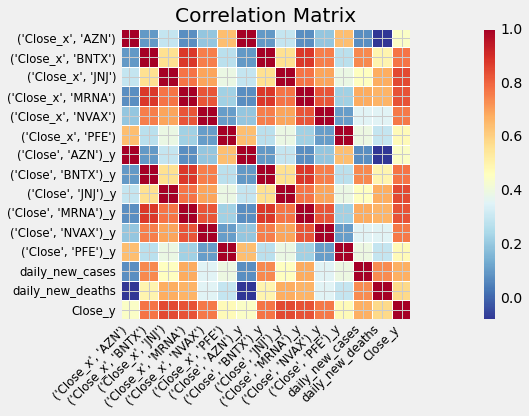

In [522]:
#calculate correlation
correlation = coivd_with_other_close_price.corr()
#plot correlation
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()